# 1123. Lowest Common Ancestor of Deepest Leaves

Given the root of a binary tree, return the lowest common ancestor of its deepest leaves.

Recall that:

The node of a binary tree is a leaf if and only if it has no children
The depth of the root of the tree is 0. if the depth of a node is d, the depth of each of its children is d + 1.
The lowest common ancestor of a set S of nodes, is the node A with the largest depth such that every node in S is in the subtree with root A.
 

Example 1:

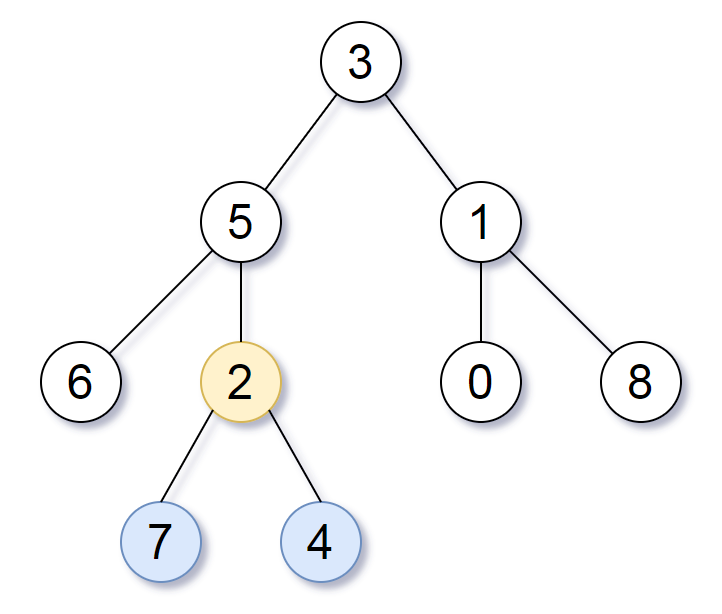

Input: root = [3,5,1,6,2,0,8,null,null,7,4]
Output: [2,7,4]
Explanation: We return the node with value 2, colored in yellow in the diagram.
The nodes coloured in blue are the deepest leaf-nodes of the tree.
Note that nodes 6, 0, and 8 are also leaf nodes, but the depth of them is 2, but the depth of nodes 7 and 4 is 3.
Example 2:

Input: root = [1]
Output: [1]
Explanation: The root is the deepest node in the tree, and it's the lca of itself.
Example 3:

Input: root = [0,1,3,null,2]
Output: [2]
Explanation: The deepest leaf node in the tree is 2, the lca of one node is itself.
 

Constraints:

The number of nodes in the tree will be in the range [1, 1000].
0 <= Node.val <= 1000
The values of the nodes in the tree are unique.

## Solution:
Using DFS to traverse through the nodes using bottom up approach. i.e we first travel to the bottom while calculating the depth of traversal and return the depths to the parent nodes. For each node there are 2 choices, left and right. Traverse to the bottom and return the last parent node of the branch having max depth. If the left and right nodes have same depth, return the left.


In [17]:
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(3)
root.left = TreeNode(5)
root.right = TreeNode(1)

root.left.left = TreeNode(6)
root.left.right = TreeNode(2)
root.right.left = TreeNode(0)
root.right.right = TreeNode(8)

root.left.right.left = TreeNode(7)
root.left.right.right = TreeNode(4)

class Solution:
    def lcaDeepestLeaves(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        def DFS(node,depth):
            #Base Case: if no nodes are further preent, return 0
            if not node:
                return 0,depth+1
            #if node exists, traverse thru the left node to the bottom
            leftnode,leftdepth=DFS(node.left,depth+1)
            #if node exists, traverse thru the right node to the bottom
            rightnode,rightdepth=DFS(node.right,depth+1)
            #return the left or right node depending upon the depth,i.e having max depth
            if leftdepth>rightdepth:
                return leftnode,leftdepth
            elif leftdepth<rightdepth:
                return rightnode,rightdepth
            else:
                return node,leftdepth #If depths are equal, return the current node and any one of the left or right depth
        node,max_depth=DFS(root,0)
        return node

In [18]:
sol=Solution()
res=sol.lcaDeepestLeaves(root)
res.val

2